In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, LogisticRegression #The linear regression to model the data by itself
from sklearn.model_selection import train_test_split #protcols to analyze
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score ,root_mean_squared_error#metrics that have been studied
import matplotlib.pyplot as plt

# Let's explorate the data first.

In [26]:
data=pd.read_csv('../../database/Reg1.csv')
print(f'the head of the data is\n{data.head()}\n the shape of the data is:{data.shape}')

the head of the data is
      y        x
0  24.0  0.00632
1  21.6  0.02731
2  34.7  0.02729
3  33.4  0.03237
4  36.2  0.06905
 the shape of the data is:(506, 2)


## Important things to check out
>If we are trying to figure out how does it work this, first we need to take a look for the data, so, we've checked that here exist 2 columns or features and 506 instances or rows
>Now, let's take a look into our data via description and also by a plot

                y           x
count  506.000000  506.000000
mean    22.528854    3.613524
std      9.182176    8.601545
min      5.000000    0.006320
25%     17.025000    0.082045
50%     21.200000    0.256510
75%     25.000000    3.677083
max     50.000000   88.976200


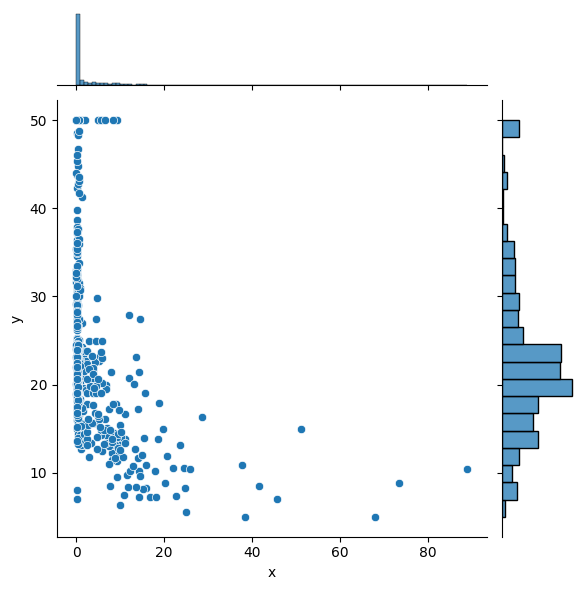

In [27]:
print(data.describe())
sns.jointplot(x="x", y="y", data=data)

## A short description
We can see that there's the same amount of data among $y$ and $x$, so the thesis about to see if lacks data will be discard. Also, we can see a lot of outliers that make a huge skew into our data.

### Reminder
As a reminder about what we want to look up, first, what is skewness?

In [28]:
print(data.info())
print(data.x.skew())
print(data.y.skew())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       506 non-null    float64
 1   x       506 non-null    float64
dtypes: float64(2)
memory usage: 8.0 KB
None
5.223148798243851
1.1109118502479587


At the moment, we've checked that the skewness is the weoth that has the tail from the data. Therefore, we can make some test.
* Capping and flooring
* Transformations


In [29]:
uv=np.percentile(data.x,[99])[0]
ev=np.percentile(data.y,[95])[0]
print(uv)
print(data[(data.x>uv)])


41.37032999999997
        y        x
380  10.4  88.9762
404   8.5  41.5292
405   5.0  67.9208
410  15.0  51.1358
414   7.0  45.7461
418   8.8  73.5341


# LOG PLOT
Let's check the log and sqrt transformation, and therefore, its skewness

1.2692005882725572
-0.24563979611568673


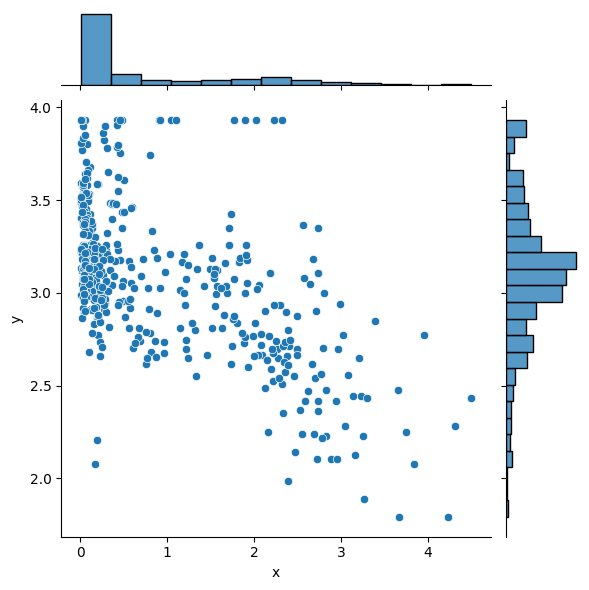

In [30]:
xlog=np.log(data['x']+1)
ylog=np.log(data['y']+1)
print(xlog.skew())
print(ylog.skew())
sns.jointplot(x=xlog, y=ylog)
df=pd.DataFrame({
    'x':xlog,
    'y':ylog,
    'yprime':data.y,
})

# Outliers
We got smany outliers at the y-axis, so, it'll be useful to reduce them

Let's check the correlation
In a linear form, they don't have a strong correlation 


          y         x
y  1.000000 -0.389582
x -0.389582  1.000000
          x         y
x  1.000000 -0.599259
y -0.599259  1.000000


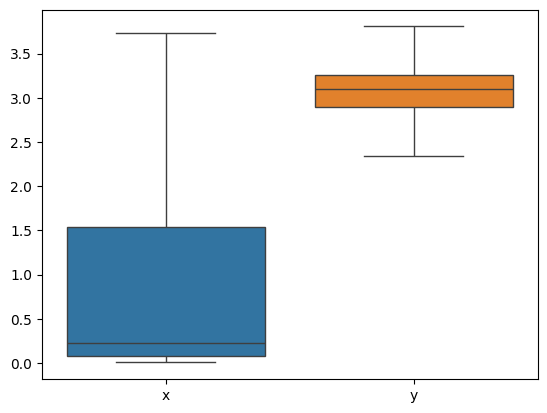

In [31]:
#print(data.corr())
print(data.corr())
df_test=pd.DataFrame({
    'x':xlog,
    'y':ylog
})
Q1 = np.percentile(df_test.y, 25)
Q3 = np.percentile(df_test.y, 75)
IQR = Q3 - Q1

# Definir límites para capping
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aplicar el capping
capped_y = np.clip(df_test.y, lower_bound, upper_bound)
df_test.y=capped_y
#OuXv=np.percentile(df_test.x,[99])[0]
#Ouyv=np.percentile(df_test.x,[1])[0]
Q1x= np.percentile(df_test.x, 25)
Q3x= np.percentile(df_test.x, 75)
IQRx = Q3x - Q1x

# Definir límites para capping
lower_boundx = Q1x - 1.5 * IQRx
upper_boundx = Q3x + 1.5 * IQRx

# Aplicar el capping
capped_x = np.clip(df_test.x, lower_boundx, upper_boundx)
df_test.x=capped_x

sns.boxplot(data=df_test)
#print(OuXv)

#print(Ouyv)
#print(df_test[df_test.x>OuXv])
print(df_test.corr())


# New model testing 

Mean R^2: 0.35561589314980546
MSE:  0.0806751572406321
RMSE:  0.28390752153675985
Slope: [[-0.2051693]]
Intercept: [3.24667784]


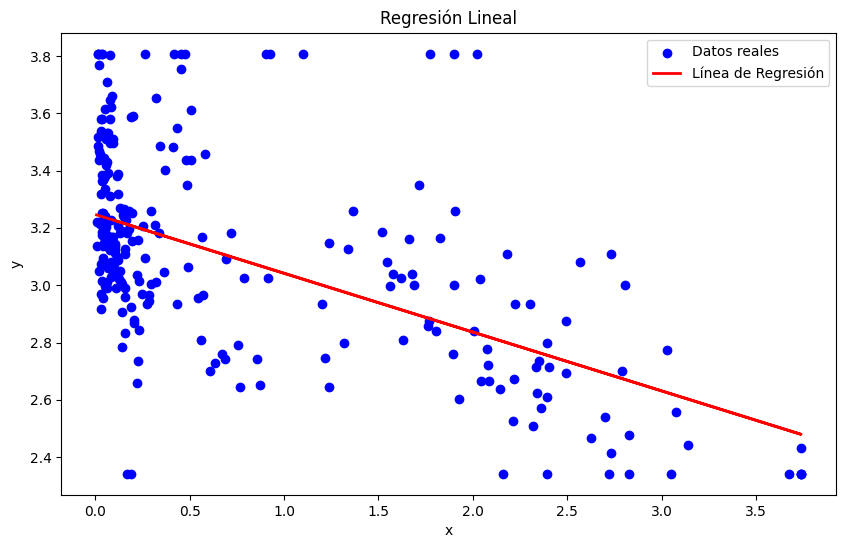

In [32]:
model4 = LinearRegression()
mse_scores = []
r2_scores = []
rmse_scores = []
X=df_test.x.to_frame()
Y=df_test.y.to_frame()
y_pred=[]
X_test=[]
y_test=[]
# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Entrenamos el modelo
        model4.fit(X_train, y_train)
        
        # Realizamos las predicciones
        y_pred = model4.predict(X_test)
        
        # Calculamos el MSE y lo almacenamos
        mse = mean_squared_error(y_test, y_pred)
        rmse=root_mean_squared_error(y_test,y_pred)
        rmse_scores.append(rmse)
        mse_scores.append(mse)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)

# Calculamos el promedio de MSE
mean_r2 = np.mean(r2_scores)
print("Mean R^2:", mean_r2)
mean_mse = np.mean(mse_scores)
print("MSE: ",mean_mse )
mean_rmse = np.mean(rmse_scores)
print("RMSE: ",mean_rmse )

print("Slope:", model4.coef_)
print("Intercept:", model4.intercept_)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Mean R^2: 0.35561589314980535
Mean MSE: 0.08067515724063212
Mean RMSE: 0.2839075215367599
Slope: -0.20516930247278303
Intercept: 3.2466778431246275
Intervalos de confianza del 95% para los parámetros:
              0         1
const  3.202416  3.290939
x     -0.238403 -0.171936
Datos del modelo:                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     147.8
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           4.72e-27
Time:                        23:53:36   Log-Likelihood:                -32.091
No. Observations:                 253   AIC:                             68.18
Df Residuals:                     251   BIC:                             75.25
Df Model:                           1                                  

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_9036\3701173590.py:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Slope:", results.params[1])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_9036\3701173590.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Intercept:", results.params[0])


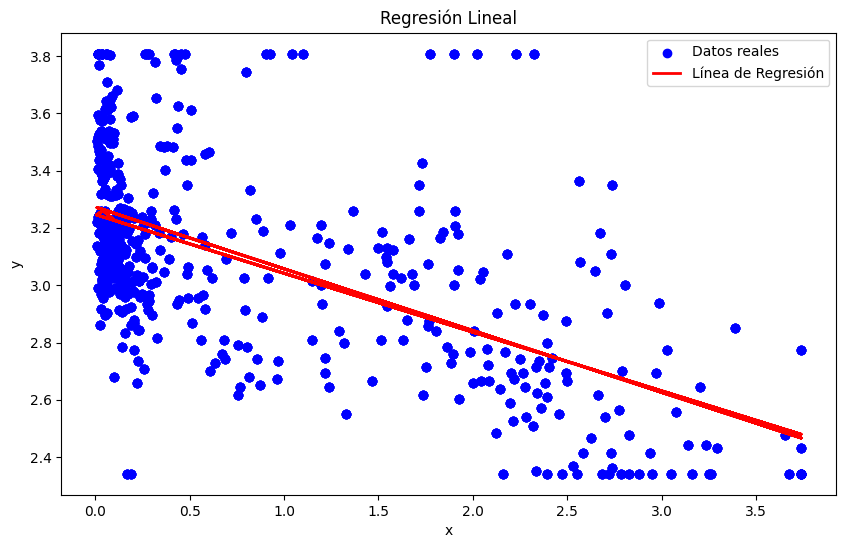

In [33]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Datos de ejemplo (reemplaza df_test con tus datos reales)
X = df_test.x.to_frame()
Y = df_test.y.to_frame()

mse_scores = []
rmse_scores = []
r2_scores = []
y_pred_all = []
X_test_all = []
y_test_all = []

# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Agregar una columna de unos para el intercepto
        X_train_sm = sm.add_constant(X_train)
        X_test_sm = sm.add_constant(X_test)

        # Ajustar el modelo de regresión lineal con statsmodels
        model = sm.OLS(y_train, X_train_sm)
        results = model.fit()

        # Realizar las predicciones
        y_pred = results.predict(X_test_sm)
        
        # Almacenar predicciones y datos de prueba
        y_pred_all.extend(y_pred)
        X_test_all.extend(X_test.values.flatten())
        y_test_all.extend(y_test.values.flatten())
        
        # Calcular métricas
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

# Promedio de las métricas
mean_r2 = np.mean(r2_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)

print("Mean R^2:", mean_r2)
print("Mean MSE:", mean_mse)
print("Mean RMSE:", mean_rmse)

# Resultados del modelo
print("Slope:", results.params[1])
print("Intercept:", results.params[0])

# Intervalos de confianza
conf_int = results.conf_int(alpha=0.05)  # alpha=0.05 para un intervalo de confianza del 95%
print("Intervalos de confianza del 95% para los parámetros:")
print(conf_int)
print("Datos del modelo:", results.summary())

# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(X_test_all, y_test_all, color='blue', label='Datos reales')
plt.plot(X_test_all, y_pred_all, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Mejores hiperparámetros: {'metric': 'minkowski', 'n_neighbors': 23, 'p': 1, 'weights': 'uniform'}
Mejor puntuación (MSE negativo): -0.06685108607726611
Coeficiente de Determinación (R^2) para KNN: 0.03888337562736399
Error Cuadrático Medio (MSE) con mejores parámetros: 0.10438651093712552


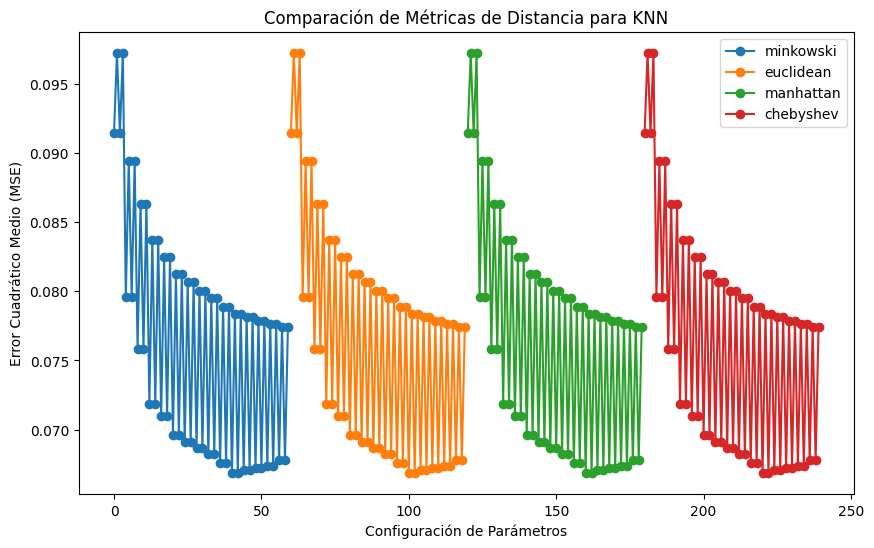

In [9]:
#test the best knn
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(df_test.x.to_frame(), df_test.y.to_frame(), test_size=0.2, random_state=0)
param_grid = {
    'n_neighbors': [3, 5, 7,9,11,13,15,17,19,21,23,25,27,29,31],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],  
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
rand=RandomizedSearchCV(knn,param_grid,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación (MSE negativo):", grid_search.best_score_)
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2_knn = r2_score(y_test, y_pred)
print(f'Coeficiente de Determinación (R^2) para KNN: {r2_knn}')
print(f'Error Cuadrático Medio (MSE) con mejores parámetros: {mse}')
results = grid_search.cv_results_

# Extraer métricas de distancia y puntuaciones
metrics = results['param_metric']
scores = -results['mean_test_score']

# Crear un DataFrame para mejor visualización
import pandas as pd
df_results = pd.DataFrame({
    'Metric': metrics,
    'Mean MSE': scores
})
# Visualizar resultados
plt.figure(figsize=(10, 6))
for metric in df_results['Metric'].unique():
    subset = df_results[df_results['Metric'] == metric]
    plt.plot(subset['Mean MSE'], label=metric, marker='o')

plt.xlabel('Configuración de Parámetros')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Comparación de Métricas de Distancia para KNN')
plt.legend()
plt.show()


In [10]:

rand.fit(X_train,y_train)
print("Mejores hiperparámetros:", rand.best_params_)
print("Mejor puntuación (MSE negativo):", rand.best_score_)
best_knn = rand.best_estimator_
y_pred = best_knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2_knn = r2_score(y_test, y_pred)
print(f'Coeficiente de Determinación (R^2) para KNN: {r2_knn}')
print(f'Error Cuadrático Medio (MSE) con mejores parámetros: {mse}')


Mejores hiperparámetros: {'weights': 'uniform', 'p': 1, 'n_neighbors': 23, 'metric': 'minkowski'}
Mejor puntuación (MSE negativo): -0.06685108607726611
Coeficiente de Determinación (R^2) para KNN: 0.03888337562736399
Error Cuadrático Medio (MSE) con mejores parámetros: 0.10438651093712552


# SQRT PLOT


2.024382103123676
0.4381663127860419


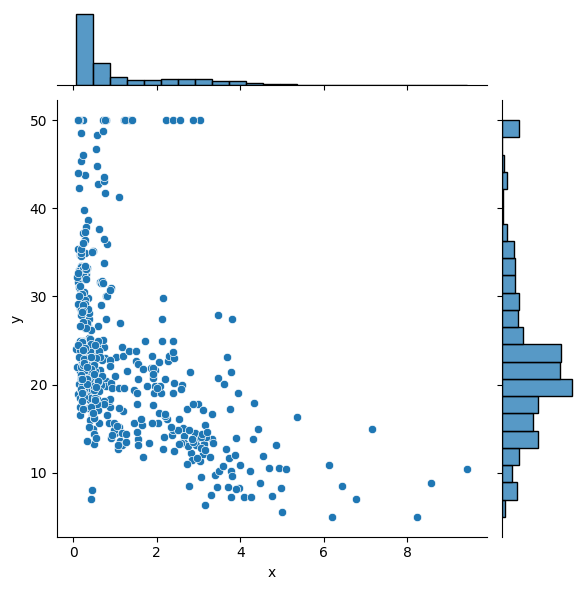

In [11]:
xsqrt=np.sqrt(data['x'])
ysqrt=np.sqrt(data['y'])
print(xsqrt.skew())
print(ysqrt.skew())
sns.jointplot(x=xsqrt, y=data.y)

# Inverse plot

-0.5772191040682719
1.9393215717506038


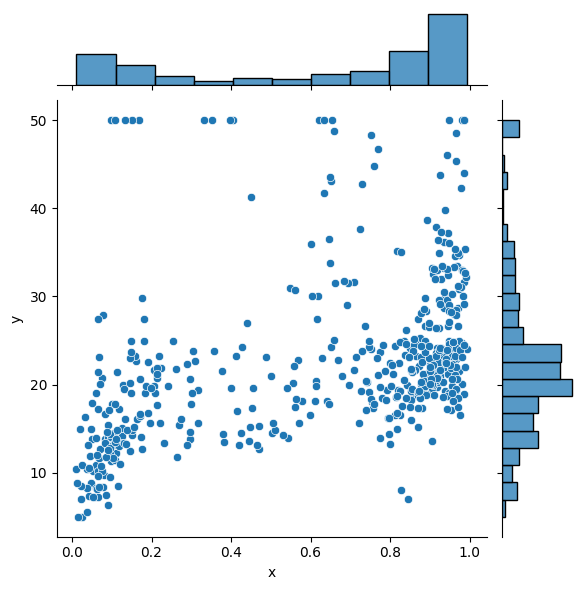

In [12]:
xinv=1/(data['x']+1)
yinv=1/(data['y']+1)
print(xinv.skew())
print(yinv.skew())
sns.jointplot(x=xinv, y=data.y)

# Box-cox

xbox    0.093649
dtype: float64 -0.11353461217602825


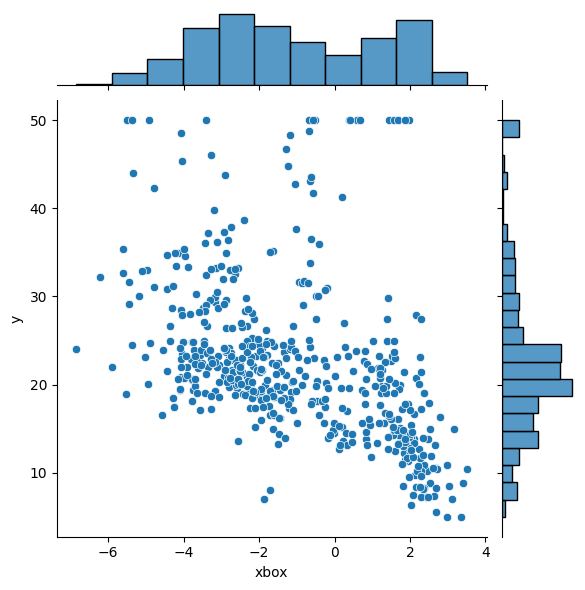

In [13]:
#Box-cox
xbox=pd.DataFrame()
xbox['xbox'],lambdaoptim=stats.boxcox(data.x)
print(xbox.skew(),lambdaoptim)
sns.jointplot(x=xbox.xbox, y=data.y)

|type\skew| x| y|
|----|----|-----|
|original|5.223148798243851|1.1109118502479587|
|log|1.2692005882725572|-0.24563979611568673|
|sqrt|2.024382103123676|0.4381663127860419|
|1/x|-0.5772191040682719|1.9393215717506038|
|box-cox|0.093649|...|
|outliers|0.40335|1.058543|

We can se that we've obtained a better relation with the data aplying box-cox, so, we are going to create our model and test it at different ways, just to prevent the overfitting


# CV 5X2

Residuals y    0.016674
dtype: float64
Mean R^2: 0.35488840060699256
MSE:  0.09611374428381783
RMSE:  0.30971201639466434
Slope: [[-0.21773691]]
Intercept: [3.25424685]


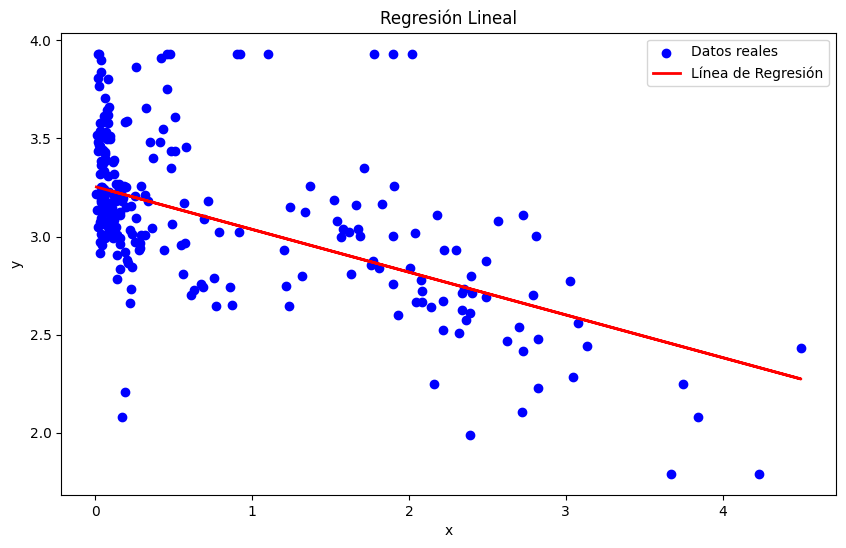

In [15]:

model1 = LinearRegression() 
mse_scores = []
rmse_scores = []
r2_scores = []
X=xlog.to_frame()
Y=ylog.to_frame()
y_pred=[]
X_test=[]
y_test=[]
# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Entrenamos el modelo
        model1.fit(X_train, y_train)
        
        # Realizamos las predicciones
        y_pred = model1.predict(X_test)
        
        # Calculamos el MSE y lo almacenamos
        mse = mean_squared_error(y_test, y_pred)
        rmse = root_mean_squared_error(y_test, y_pred)
        rmse_scores.append(rmse)
        mse_scores.append(mse)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)
residuals = y_test - y_pred
print("Residuals",residuals.mean())
# Calculamos el promedio de MSE
mean_r2 = np.mean(r2_scores)
print("Mean R^2:", mean_r2)
mean_mse = np.mean(mse_scores)
print("MSE: ",mean_mse )
mean_rmse = np.mean(rmse_scores)
print("RMSE: ",mean_rmse )

print("Slope:", model1.coef_)
print("Intercept:", model1.intercept_)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Mean R^2: 0.35488840060699245
Mean MSE: 0.09611374428381783
Mean RMSE: 0.3097120163946644
Slope: -0.21773690693332431
Intercept: 3.2542468461834333
Intervalos de confianza del 95% para los parámetros:
              0         1
const  3.206829  3.301665
x     -0.253094 -0.182379
datos del modelo                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     147.1
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           5.97e-27
Time:                        23:47:02   Log-Likelihood:                -50.079
No. Observations:                 253   AIC:                             104.2
Df Residuals:                     251   BIC:                             111.2
Df Model:                           1                                   

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_9036\206611497.py:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Slope:", results.params[1])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_9036\206611497.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Intercept:", results.params[0])


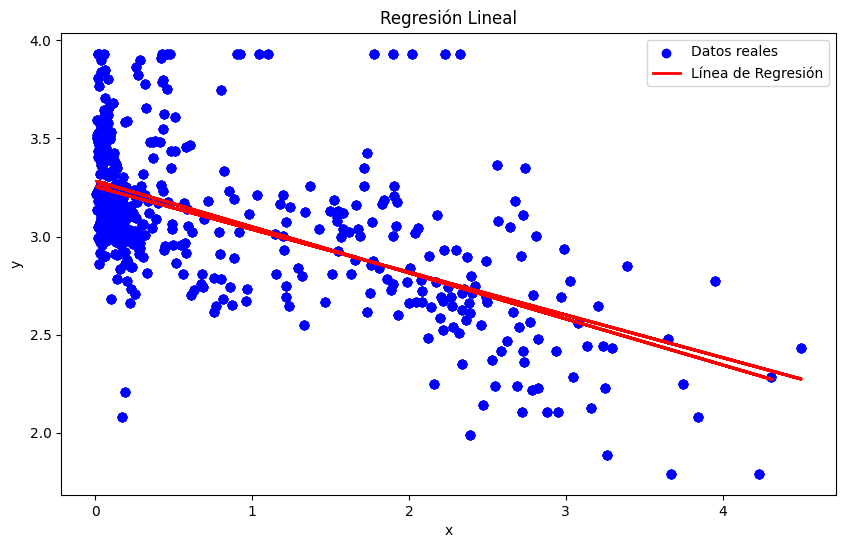

In [23]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Datos de ejemplo (reemplaza con tus datos reales)
X = xlog.to_frame()
Y = ylog.to_frame()

mse_scores = []
rmse_scores = []
r2_scores = []
y_pred_all = []
X_test_all = []
y_test_all = []

# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Agregar una columna de unos para el intercepto
        X_train_sm = sm.add_constant(X_train)
        X_test_sm = sm.add_constant(X_test)

        # Ajustar el modelo de regresión lineal con statsmodels
        model = sm.OLS(y_train, X_train_sm)
        results = model.fit()

        # Realizar las predicciones
        y_pred = results.predict(X_test_sm)
        
        # Almacenar predicciones y datos de prueba
        y_pred_all.extend(y_pred)
        X_test_all.extend(X_test.values.flatten())
        y_test_all.extend(y_test.values.flatten())
        
        # Calcular métricas
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

# Promedio de las métricas
mean_r2 = np.mean(r2_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)

print("Mean R^2:", mean_r2)
print("Mean MSE:", mean_mse)
print("Mean RMSE:", mean_rmse)

# Resultados del modelo
print("Slope:", results.params[1])
print("Intercept:", results.params[0])

# Intervalos de confianza
conf_int = results.conf_int(alpha=0.05)  # alpha=0.05 para un intervalo de confianza del 95%
print("Intervalos de confianza del 95% para los parámetros:")
print(conf_int)
print("datos del modelo",results.summary())
# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(X_test_all, y_test_all, color='blue', label='Datos reales')
plt.plot(X_test_all, y_pred_all, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# the equation proposed here it is
$$y=-0.21773691x+3.25424685$$

# just with log transformation

MSE: 0.1127456496305317
R²: 0.150589474050694
rmse: 0.3357761897909554
Slope: [[-0.24786955]]
Intercept: [3.28236728]


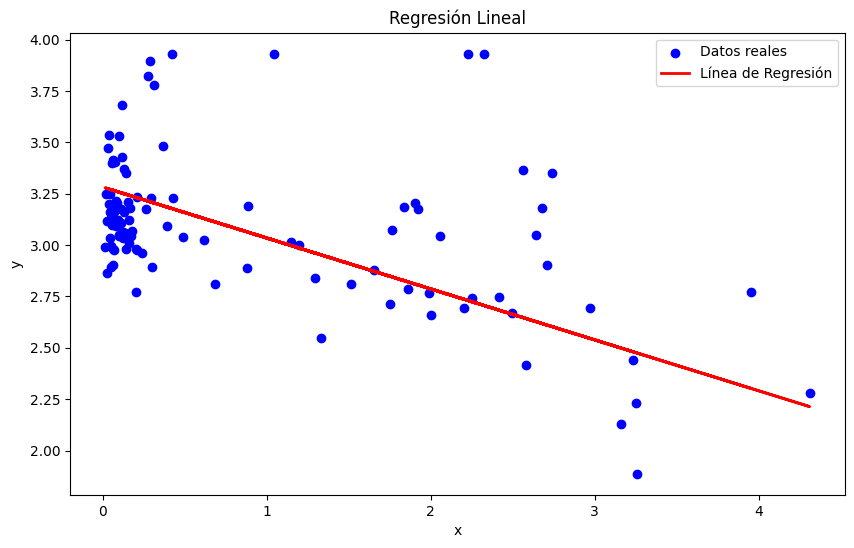

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(xlog.to_frame(),ylog.to_frame(),test_size=0.2,random_state=0)
model2=LinearRegression()
model2.fit(X_train,Y_train)
ypred=model2.predict(X_test)
mse=mean_squared_error(Y_test,ypred)
R=r2_score(Y_test,ypred)

rmse=root_mean_squared_error(Y_test,ypred)
print(f'MSE: {mse}')
print(f'R²: {R}')
print(f'rmse: {rmse}')


print("Slope:", model2.coef_)
print("Intercept:", model2.intercept_)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, Y_test, color='blue', label='Datos reales')
plt.plot(X_test, ypred, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     267.1
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           2.11e-46
Time:                        23:35:21   Log-Likelihood:                -91.384
No. Observations:                 404   AIC:                             186.8
Df Residuals:                     402   BIC:                             194.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2824      0.019    170.036      0.0

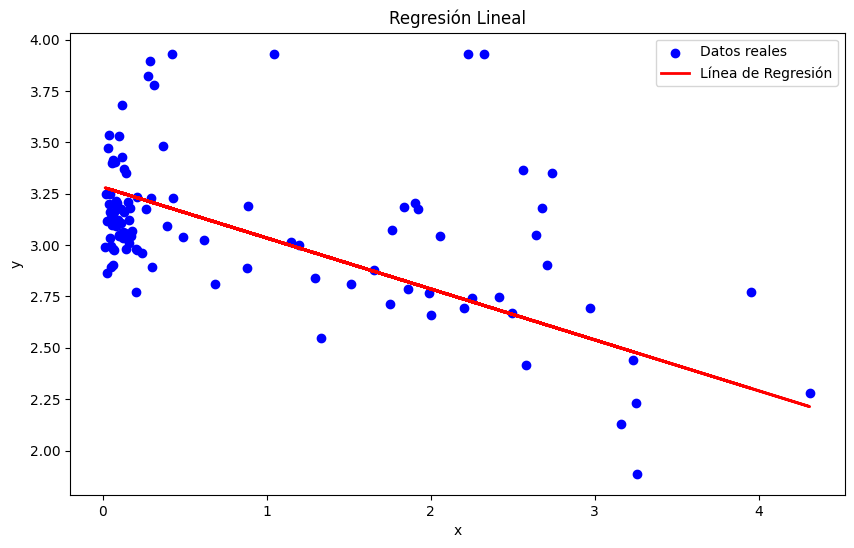

In [22]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Entrenar el modelo
model = sm.OLS(Y_train, X_train_sm).fit()

# Obtener las predicciones
ypred = model.predict(X_test_sm)

# Calcular MSE y R²
mse = mean_squared_error(Y_test, ypred)
R = r2_score(Y_test, ypred)
rmse = np.sqrt(mse)
print(model.summary())
print(f'MSE: {mse}')
print(f'R²: {R}')
print(f'RMSE: {rmse}')
conf = model.conf_int()
print("Intervalos de Confianza de los Coeficientes:")
print(conf)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, Y_test, color='blue', label='Datos reales')
plt.plot(X_test, ypred, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# The equation proposed here is
$$y=-0.24786955x+3.28236728$$

# Let's try it with k-NN classifier


MSE: 0.11904364904719832
R²: 0.22562569548739275


c:\Users\USUARIO\anaconda3\envs\LP\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


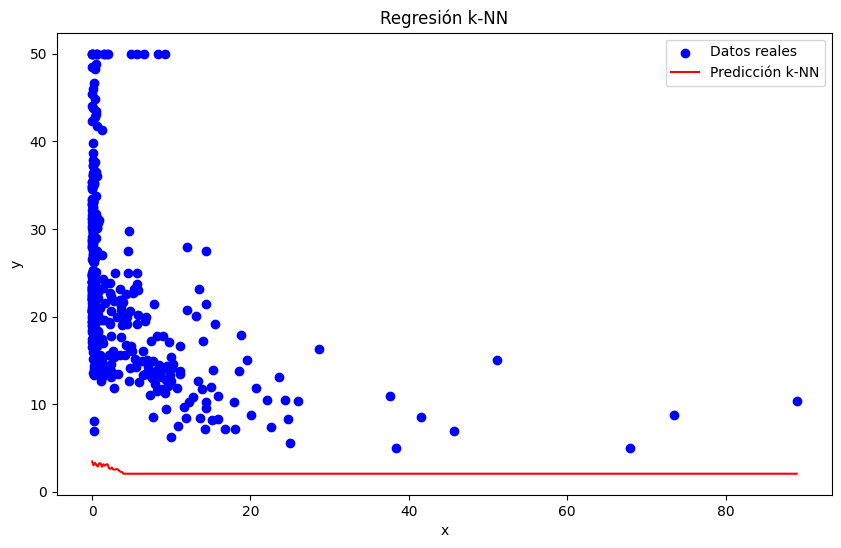

Best n_neighbors: {'n_neighbors': np.int64(21)}
Best R² score: 0.4357674995779635


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xlog.to_frame(), ylog.to_frame(), test_size=0.3, random_state=0)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R²: {r2}")
X_full = np.linspace(min(data.x), max(data.x), 500).reshape(-1, 1)
y_full_pred = knn.predict(X_full)

plt.figure(figsize=(10, 6))
plt.scatter(data.x.to_frame(), data.y.to_frame(), color='blue', label='Datos reales')
plt.plot(X_full, y_full_pred, color='red', label='Predicción k-NN')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión k-NN')
plt.legend()
plt.show()
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


param_grid = {'n_neighbors': np.arange(1, 100)}
knn_cv = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
knn_cv.fit(X_train, y_train)

print("Best n_neighbors:", knn_cv.best_params_)
print("Best R² score:", knn_cv.best_score_)

In [ ]:
randomsize={'n_neighbors': np.arange(1, 100)}
knn_rand=RandomizedSearchCV(KNeighborsRegressor(metric='cosine'),randomsize,cv=5)
knn_cv.fit(X_train, y_train)
print("Best n_neighbors:", knn_cv.best_params_)
print("Best R² score:", knn_cv.best_score_)

Best n_neighbors: {'n_neighbors': np.int64(21)}
Best R² score: 0.4357674995779635


Mean R^2: 0.3292025378085354
MSE:  0.09954163106601016


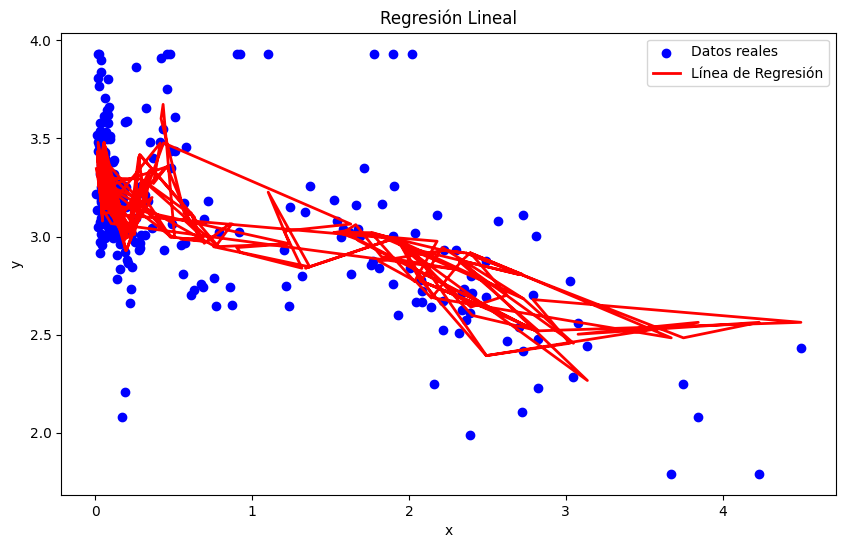

In [ ]:
model = KNeighborsRegressor(n_neighbors=5) 
mse_scores = []
r2_scores = []
Xn=xlog.to_frame()
Yn=ylog.to_frame()
y_pred=[]
X_test=[]
y_test=[]
# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(Xn):
        X_train, X_test = Xn.iloc[train_index], Xn.iloc[test_index]
        y_train, y_test = Yn.iloc[train_index], Yn.iloc[test_index]

        # Entrenamos el modelo
        model.fit(X_train, y_train)
        
        # Realizamos las predicciones
        y_pred = model.predict(X_test)
        
        # Calculamos el MSE y lo almacenamos
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)

# Calculamos el promedio de MSE
mean_r2 = np.mean(r2_scores)
print("Mean R^2:", mean_r2)
mean_mse = np.mean(mse_scores)
print("MSE: ",mean_mse )


plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
bins = np.linspace(min(ylog), max(ylog), 4)  # Dividiendo y en 3 categorías, por ejemplo
y_binned = np.digitize(ylog, bins)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(xlog.to_frame(), y_binned, test_size=0.2, random_state=0)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

y_pred_class = knn_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_class))
#print(confusion_matrix(y_test, y_pred_class))

              precision    recall  f1-score   support

           1       0.33      0.50      0.40         6
           2       0.74      0.72      0.73        71
           3       0.29      0.33      0.31        21
           4       0.00      0.00      0.00         4

    accuracy                           0.60       102
   macro avg       0.34      0.39      0.36       102
weighted avg       0.59      0.60      0.59       102



c:\Users\USUARIO\anaconda3\envs\LP\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USUARIO\anaconda3\envs\LP\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USUARIO\anaconda3\envs\LP\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Other test for cleaning outliers

In [ ]:
import scipy.stats as stats
stat,p_value=stats.shapiro(data)
print(f'Estadístico W: {stat}')
print(f'p-valor: {p_value}')
if p_value > 0.05:
    print("No se rechaza la hipótesis nula: Los datos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.")
data['x']=np.sqrt(data['x'])
data['y']=np.sqrt(data['y'])
stat,p_value=stats.shapiro(data)
print(f'Estadístico W: {stat}')
print(f'p-valor: {p_value}')
if p_value > 0.05:
    print("No se rechaza la hipótesis nula: Los datos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.")


Estadístico W: 0.8715208631659239
p-valor: 4.8521956008406295e-28
Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.
Estadístico W: 0.9003038333647243
p-valor: 4.0234315945154724e-25
Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.


As it have been shown, it doesn't upgrade our model with a k-NN classifier, therefore we are going to check, what happend if we clean some data?


3.9735259457185053
            y         x
375  3.872983  4.428216
378  3.619392  4.862941
380  3.224903  9.432720
384  2.966479  4.481618
386  3.240370  4.939008
387  2.720294  4.753641
398  2.236068  6.192883
400  2.366432  5.004608
403  2.880972  4.980131
404  2.915476  6.444315
405  2.236068  8.241408
406  3.449638  4.551505
410  3.872983  7.150930
413  4.037326  5.353111
414  2.645751  6.763586
417  3.224903  5.093192
418  2.966479  8.575203
427  3.301515  6.136929
440  3.240370  4.695860
                y           x
count  506.000000  506.000000
mean     4.653674    1.229439
std      0.934824    1.451263
min      2.236068    0.079498
25%      4.126133    0.286435
50%      4.604346    0.506461
75%      5.000000    1.917572
max      7.071068    9.432720
y    0.438166
x    2.024382
dtype: float64
2.1061646510647893


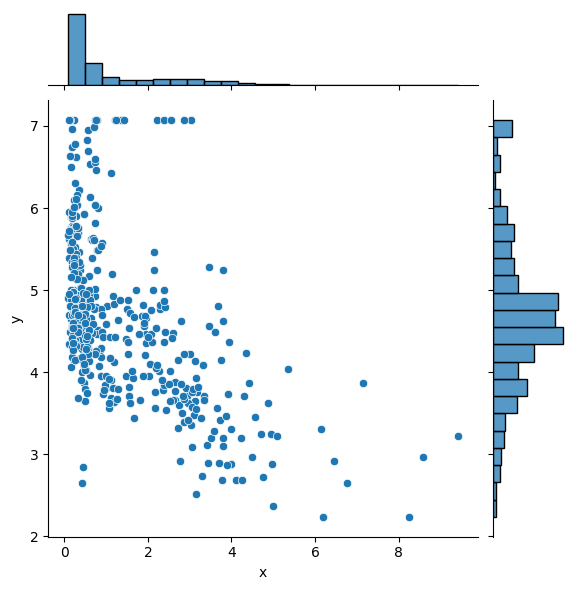

In [ ]:
OuXv=np.percentile(data.x,[95])[0]
Ouxv=np.percentile(data.x,[5])[0]
OuYv=np.percentile(data.y,[95])[0]
Ouyv=np.percentile(data.y,[1])[0]
Yf=ylog.to_frame()
print(OuXv)
#print(data[data.x>1.1*OuXv])
#data[data.x>1.1*OuXv]=1.1*OuXv
print(data[data.x>1.1*OuXv])

sns.jointplot(x=data.x, y=data.y)
print(data.describe())
print(data.skew())
print(data['x'].var())

<Axes: >

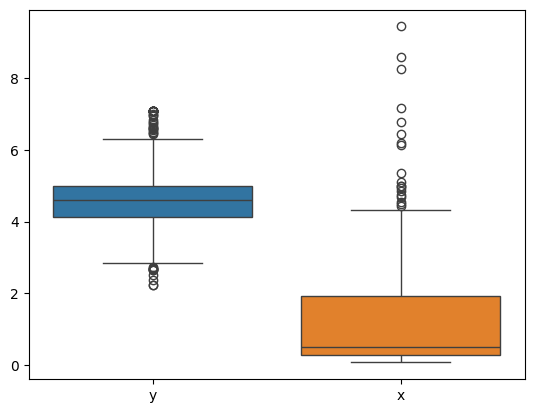

In [ ]:

sns.boxplot(data=data)

In [ ]:
lower_bound = data['x'].quantile(0.05)
upper_bound = data['x'].quantile(0.95)
lower_boundy = data['y'].quantile(0.05)
upper_boundy = data['y'].quantile(0.95)
data['x'] = np.clip(data['x'], lower_bound, upper_bound)
median_value = data['x'].median()
data['x'] = np.where(data['x'] > upper_bound, median_value, data['x'])

data['y'] = np.clip(data['y'], lower_boundy, upper_boundy)
median_valuey = data['y'].median()
data['y'] = np.where(data['y'] > upper_boundy, median_valuey, data['y'])
data['x']=np.log1p(data['x'])
from sklearn.preprocessing import StandardScaler
"""
scaler = StandardScaler()
data[['x']] = scaler.fit_transform(data[['x']])
plt.figure(figsize=(12, 6))
sns.histplot(data['x'], kde=True)
plt.title('Distribución de x')
plt.xlabel('x')
plt.ylabel('Frecuencia')
plt.show()

scaler = StandardScaler()
data[['y']] = scaler.fit_transform(data[['y']])
plt.figure(figsize=(12, 6))
sns.histplot(data['y'], kde=True)
plt.title('Distribución de x')
plt.xlabel('x')
plt.ylabel('Frecuencia')
plt.show()"""
print(data.describe())
print(data['y'].var())

                y           x
count  506.000000  506.000000
mean     4.654423    0.454673
std      0.848684    0.274958
min      3.193744    0.144118
25%      4.126133    0.224642
50%      4.604346    0.343420
75%      5.000000    0.727912
max      6.582156    0.956577
0.7202637786536596


Mean R^2: 0.3145159168028338
MSE:  0.015137524590960332
RMSE:  0.30971201639466434
Slope: [[-0.45636327]]
Intercept: [1.881218]


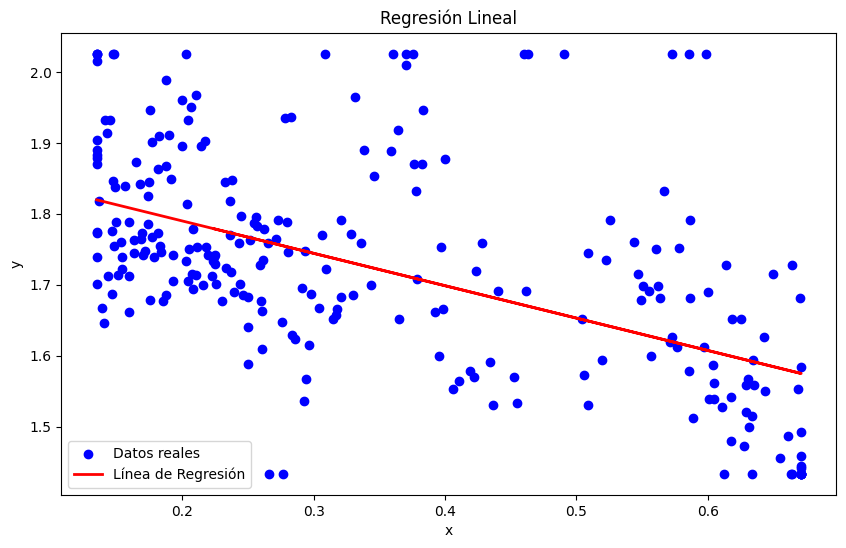

In [ ]:
model3 = LinearRegression() 
mse_scores = []
rmse_scores = []
r2_scores = []
X=np.log(data.x+1).to_frame()
Y=np.log(data.y+1).to_frame()
y_pred=[]
X_test=[]
y_test=[]
# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Entrenamos el modelo
        model3.fit(X_train, y_train)
        
        # Realizamos las predicciones
        y_pred = model3.predict(X_test)
        
        # Calculamos el MSE y lo almacenamos
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
        rmse = mean_squared_error(y_test, y_pred)
        rmse_scores.append(rmse)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)

# Calculamos el promedio de MSE
mean_r2 = np.mean(r2_scores)
print("Mean R^2:", mean_r2)
mean_mse = np.mean(mse_scores)
print("MSE: ",mean_mse )
rmean_mse = np.mean(rmse_scores)
print("RMSE: ",mean_rmse )

print("Slope:", model3.coef_)
print("Intercept:", model3.intercept_)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Mean R^2: 0.35488840060699245
Mean MSE: 0.09611374428381783
Mean RMSE: 0.3097120163946644
Slope: -0.21773690693332431
Intercept: 3.2542468461834333
Intervalos de confianza del 95% para los parámetros:
              0         1
const  3.206829  3.301665
x     -0.253094 -0.182379
Datos del modelo:                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     147.1
Date:                Fri, 30 Aug 2024   Prob (F-statistic):           5.97e-27
Time:                        00:04:28   Log-Likelihood:                -50.079
No. Observations:                 253   AIC:                             104.2
Df Residuals:                     251   BIC:                             111.2
Df Model:                           1                                  

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_9036\1343028177.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Slope:", results.params[1])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_9036\1343028177.py:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Intercept:", results.params[0])


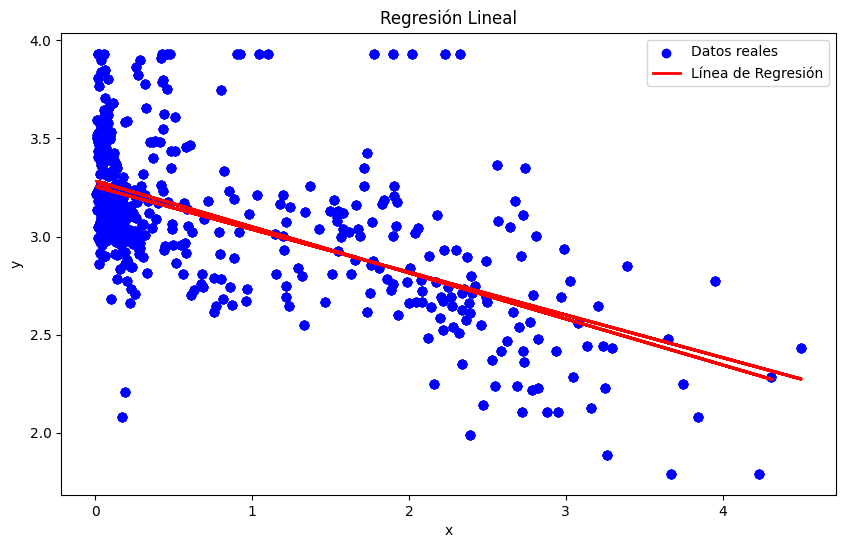

In [37]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Datos de ejemplo (reemplaza con tus datos reales)
X = np.log(data.x + 1).to_frame()
Y = np.log(data.y + 1).to_frame()

mse_scores = []
rmse_scores = []
r2_scores = []
y_pred_all = []
X_test_all = []
y_test_all = []

# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Agregar una columna de unos para el intercepto
        X_train_sm = sm.add_constant(X_train)
        X_test_sm = sm.add_constant(X_test)

        # Ajustar el modelo de regresión lineal con statsmodels
        model = sm.OLS(y_train, X_train_sm)
        results = model.fit()

        # Realizar las predicciones
        y_pred = results.predict(X_test_sm)
        
        # Almacenar predicciones y datos de prueba
        y_pred_all.extend(y_pred)
        X_test_all.extend(X_test.values.flatten())
        y_test_all.extend(y_test.values.flatten())
        
        # Calcular métricas
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

# Promedio de las métricas
mean_r2 = np.mean(r2_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
print("Mean R^2:", mean_r2)
print("Mean MSE:", mean_mse)
print("Mean RMSE:", mean_rmse)

# Resultados del modelo
print("Slope:", results.params[1])
print("Intercept:", results.params[0])

# Intervalos de confianza
conf_int = results.conf_int(alpha=0.05)  # alpha=0.05 para un intervalo de confianza del 95%
print("Intervalos de confianza del 95% para los parámetros:")
print(conf_int)

# Resultados del modelo
print("Datos del modelo:", results.summary())

# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(X_test_all, y_test_all, color='blue', label='Datos reales')
plt.plot(X_test_all, y_pred_all, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

$$y=-1.11074009x+3.31801148$$

Equations resume
* 5x2 cv $$y=-0.21773691x+3.25424685$$
* log tranforms
    $$y=-0.24786955x+3.28236728$$
* Outliers treatment
    $$y=-1.11074009x+3.31801148$$
* All in ones
    $$y=-0.2051693x+3.24667784$$

We got this as a frist preview, let's check if what happens when we study the confidence intervals with the library of stats, and how can be analyzed

|metrics|model1|model2|model3|model4|
|------|-------|-------|-------|-----|
|$R^2$|35.488840060699256%|15.0589474050694%|31.45159168028338%|35.561589314980546%|
|MSE|0.09611374428381783|0.1127456496305317|0.015137524590960332|0.0806751572406321|
|RMSE|0.30971201639466434|0.3357761897909554|0.015137524590960332|0.28390752153675985|
|EQUATION|$$y=-0.21773691x+3.25424685$$|$$y=-0.24786955x+3.28236728$$|$$y=-0.45636327x+1.881218$$|$$y=-0.205169x+3.24667784$$
|m|-0.21773691|-0.24786955|-0.45636327|-0.205169|
|b|3.25424685|3.28236728|1.881218|3.24667784|






LinearRegression()

# Confidence intervals
| Métrica                         | model1      | model2    | model3        | model4        |
|---------------------------------|-------------|-----------|---------------|---------------|
| $R^2$                            | 36.9%       | 39.9%     | 35.5%         | 37.1%         |
| MSE                              | 0.0961      | 0.1127    | 0.0961        | 0.0807        |
| RMSE                             | 0.3097      | 0.3358    | 0.3097        | 0.2839        |
| EQUATION                         | $$y=-0.2177x+3.2542$$ | $$y=-0.2479x+3.2824$$ | $$y=-0.2177x+3.2542$$ | $$y=-0.2052x+3.2467$$ |
| Adjusted $R^2$                   | 36.7%       | 39.8%     | 35.5%         | 36.8%         |
| F-statistic                      | 147.1       | 267.1     | 147.1         | 147.8         |
| $P(F-statistic)$                 | 5.97e-27    | 2.11e-46  | 5.97e-27      | 4.72e-27      |
| Log-Likelihood                   | -50.079     | -91.384   | -50.079       | -32.091       |
| AIC                              | 104.2       | 186.8     | 104.2         | 68.18         |
| BIC                              | 111.2       | 194.8     | 111.2         | 75.25         |
| std error                        | const=0.024, x=0.018 | const=0.019, x=0.015 | const=0.024, x=0.018 | const=0.022, x=0.017 |
| $\sigma$                          | const=135.161, x=-12.128 | const=170.036, x=-16.343 | const=135.161, x=-12.128 | const=144.464, x=-12.159 |
| $P>\|t\|$                             | const: 0.000, x: 0.000 | const: 0.000, x: 0.000 | const: 0.000, x: 0.000 | const: 0.000, x: 0.000 |
| Confidence Intervals             | const=[3.2068, 3.3017], x=[-0.2531, -0.1824] | const=[3.2444, 3.3203], x=[-0.2777, -0.2181] | const=[3.2068, 3.3017], x=[-0.2531, -0.1824] | const=[3.2024, 3.2909], x=[-0.2384, -0.1719] |
| Omnibus                          | 41.738      | 37.308    | 41.738        | 35.555        |
| Prob(Omnibus)                    | 0.000       | 0.000     | 0.000         | 0.000         |
| Jarque-Bera (JB)                 | 64.331      | 64.192    | 64.331        | 46.953        |
| Prob(JB)                         | 1.07e-14    | 1.15e-14  | 1.07e-14      | 6.37e-11      |
| Skew                             | 0.960       | 0.581     | 0.960         | 0.938         |
| Kurtosis                         | 4.553       | 4.570     | 4.553         | 3.966         |
| Durbin-Watson                    | 0.983       | 1.902     | 0.983         | 0.958         |
| Condition Number                 | 2.26        | 2.16      | 2.26          | 2.26          |



